Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the dataset - TRAIN SET

In [ ]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[ : , 3:-2]
y = dataset.iloc[ : , -2:]
dataset.head()

pet_id       issue_date  ... breed_category  pet_category
0  ANSL_69903  10-07-2016 0:00  ...              0             1
1  ANSL_66892  21-11-2013 0:00  ...              0             2
2  ANSL_69750  28-09-2014 0:00  ...              2             4
3  ANSL_71623  31-12-2016 0:00  ...              0             2
4  ANSL_57969  28-09-2017 0:00  ...              0             1

[5 rows x 11 columns]

In [ ]:
X.head()

condition   color_type  length(m)  height(cm)  X1  X2
0        2.0  Brown Tabby       0.80        7.78  13   9
1        1.0        White       0.72       14.19  13   9
2        NaN        Brown       0.15       40.90  15   4
3        1.0        White       0.62       17.82   0   1
4        2.0        Black       0.50       11.06  18   4

In [ ]:
y.head()

breed_category  pet_category
0               0             1
1               0             2
2               2             4
3               0             2
4               0             1

In [ ]:
y.breed_category.unique()

array([0, 2, 1])

In [ ]:
y.pet_category.unique()

array([1, 2, 4, 0])

In [ ]:
y.breed_category.value_counts()

0    9000
1    8357
2    1477
Name: breed_category, dtype: int64

In [ ]:
y.pet_category.value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  int64  
 10  pet_category    18834 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.6+ MB


In [ ]:
dataset.condition.value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [ ]:
len(dataset.color_type.unique().tolist())

56

In [ ]:
dataset['length(m)'].value_counts()

0.08    216
0.60    213
0.44    210
0.30    209
0.85    208
       ... 
0.68    163
0.34    157
0.17    147
1.00    107
0.00     93
Name: length(m), Length: 101, dtype: int64

In [ ]:
dataset.breed_category.value_counts()

0    9000
1    8357
2    1477
Name: breed_category, dtype: int64

In [ ]:
dataset.pet_category.value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [ ]:
print(X)

       condition    color_type  length(m)  height(cm)  X1  X2
0            2.0   Brown Tabby       0.80        7.78  13   9
1            1.0         White       0.72       14.19  13   9
2            NaN         Brown       0.15       40.90  15   4
3            1.0         White       0.62       17.82   0   1
4            2.0         Black       0.50       11.06  18   4
...          ...           ...        ...         ...  ..  ..
18829        2.0      Tricolor       0.44       27.36   0   1
18830        NaN         Brown       0.73       14.25  15   4
18831        0.0  Calico Point       0.99       28.13  13   9
18832        0.0           Tan       0.55       44.82  13   9
18833        0.0         Brown       0.86       37.40   0   1

[18834 rows x 6 columns]


In [ ]:
print(y)

       breed_category  pet_category
0                   0             1
1                   0             2
2                   2             4
3                   0             2
4                   0             1
...               ...           ...
18829               0             2
18830               2             4
18831               1             1
18832               1             2
18833               1             2

[18834 rows x 2 columns]


Splitting the train_set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.head()

condition   color_type  length(m)  height(cm)  X1  X2
10549        NaN        Black       0.78       33.49  15   4
7885         0.0        White       0.65       29.41  13   9
17731        NaN        Black       0.50       13.43  15   4
17526        2.0        Black       0.81       33.05   0   7
2880         2.0  Brown Tabby       0.67       15.94  13   9

In [ ]:
y_train

breed_category  pet_category
10549               2             4
7885                1             2
17731               2             4
17526               0             2
2880                1             1
...               ...           ...
9225                1             2
13123               1             1
9845                1             1
10799               1             2
2732                2             1

[14125 rows x 2 columns]

In [ ]:
y_train.shape

(14125, 2)

Correlation Matrix



In [ ]:
# dataset.corr()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


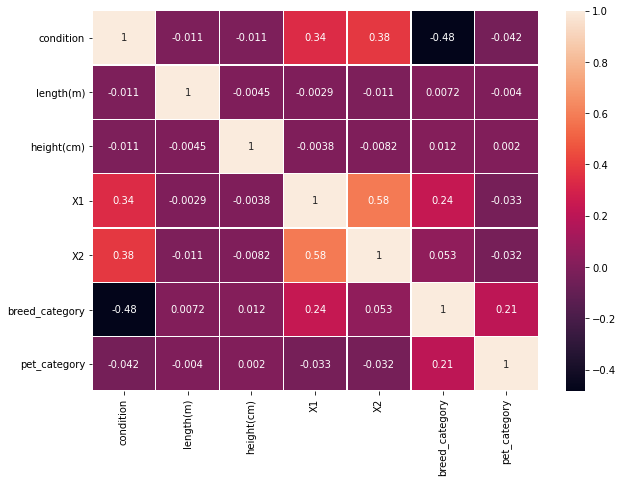

In [ ]:
import seaborn as sns
# hm = sns.heatmap(dataset[["condition", "length(m)", "height(cm)",	"X1",	"X2",	"breed_category",	"pet_category" ]])
_, size=plt.subplots(figsize = (10, 7))
sns.heatmap(dataset.corr(), annot=True, linewidths= .5, ax = size)

Taking care of the missing data of the train_train_set



In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X_train[['condition']])
X_train[['condition']] = imputer.transform(X_train[['condition']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
X_test[['condition']] = imputer.transform(X_test[['condition']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
X_train.head()

condition   color_type  length(m)  height(cm)  X1  X2
10549   0.890252        Black       0.78       33.49  15   4
7885    0.000000        White       0.65       29.41  13   9
17731   0.890252        Black       0.50       13.43  15   4
17526   2.000000        Black       0.81       33.05   0   7
2880    2.000000  Brown Tabby       0.67       15.94  13   9

In [ ]:
X_test

condition    color_type  length(m)  height(cm)  X1  X2
7946         1.0           Tan       0.81        6.30  18   4
9184         0.0           Tan       0.27       22.12   0   1
3572         2.0  Orange Tabby       0.61       21.23  13   9
13570        2.0    Gray Tabby       0.94       34.27   0   1
16456        1.0         Black       0.78       43.95   0   1
...          ...           ...        ...         ...  ..  ..
14486        1.0         White       0.24       45.33   0   1
13296        1.0  Orange Tabby       0.08       43.21   0   1
8701         1.0          Blue       0.84       18.52   0   1
12739        0.0   Brown Tabby       0.07       11.58   0   1
5441         0.0   Brown Tabby       0.45       33.82   0   1

[4709 rows x 6 columns]

Encoding the independent variable (color_type) of the train_set

In [ ]:
dataset.color_type

0         Brown Tabby
1               White
2               Brown
3               White
4               Black
             ...     
18829        Tricolor
18830           Brown
18831    Calico Point
18832             Tan
18833           Brown
Name: color_type, Length: 18834, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['color_type'] = le.fit_transform(X_train.iloc[:, 1])
le.classes_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Agouti', 'Apricot', 'Black', 'Black Brindle', 'Black Smoke',
       'Black Tabby', 'Black Tiger', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Point', 'Blue Smoke', 'Blue Tabby', 'Blue Tick',
       'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tabby', 'Brown Tiger', 'Buff', 'Calico', 'Calico Point',
       'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby', 'Fawn',
       'Flame Point', 'Gold', 'Gray', 'Gray Tabby', 'Green',
       'Lilac Point', 'Liver', 'Liver Tick', 'Lynx Point', 'Orange',
       'Orange Tabby', 'Pink', 'Red', 'Red Merle', 'Red Tick', 'Sable',
       'Seal Point', 'Silver', 'Silver Lynx Point', 'Silver Tabby', 'Tan',
       'Torbie', 'Tortie', 'Tortie Point', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle'], dtype=object)

In [ ]:
X_test['color_type'] = le.transform(X_test.iloc[:, 1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train.head()

condition  color_type  length(m)  height(cm)  X1  X2
10549   0.890252           2       0.78       33.49  15   4
7885    0.000000          53       0.65       29.41  13   9
17731   0.890252           2       0.50       13.43  15   4
17526   2.000000           2       0.81       33.05   0   7
2880    2.000000          18       0.67       15.94  13   9

In [ ]:
X_train

condition  color_type  length(m)  height(cm)  X1  X2
10549   0.890252           2       0.78       33.49  15   4
7885    0.000000          53       0.65       29.41  13   9
17731   0.890252           2       0.50       13.43  15   4
17526   2.000000           2       0.81       33.05   0   7
2880    2.000000          18       0.67       15.94  13   9
...          ...         ...        ...         ...  ..  ..
9225    2.000000          40       0.14       12.21  18   4
13123   0.000000          38       0.78       23.05   0   1
9845    2.000000          12       0.94       31.45  13   9
10799   0.000000          15       0.08       35.33   7   1
2732    0.890252          38       0.40       19.77   0   4

[14125 rows x 6 columns]

Feature Scaling on TRAIN SET

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:] = sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:,:] = sc.transform(X_test.iloc[:,:])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
X_train

condition  color_type  length(m)  height(cm)        X1        X2
10549   0.000000   -1.158178   0.960247    0.468427  1.471828 -0.162539
7885   -1.201871    1.472833   0.509821    0.154582  1.166993  1.259401
17731   0.000000   -1.158178  -0.009903   -1.074646  1.471828 -0.162539
17526   1.498197   -1.158178   1.064192    0.434581 -0.814432  0.690625
2880    1.498197   -0.332763   0.579117   -0.881570  1.166993  1.259401
...          ...         ...        ...         ...       ...       ...
9225    1.498197    0.802183  -1.257238   -1.168492  1.929079 -0.162539
13123  -1.201871    0.699006   0.960247   -0.334648 -0.814432 -1.015703
9845    1.498197   -0.642293   1.514619    0.311505  1.166993  1.259401
10799  -1.201871   -0.487528  -1.465128    0.609966  0.252489 -1.015703
2732    0.000000    0.699006  -0.356385   -0.586955 -0.814432 -0.162539

[14125 rows x 6 columns]

In [ ]:
X_test

condition  color_type  length(m)  height(cm)        X1        X2
7946    0.148163    1.214890   1.064192   -1.623107  1.929079 -0.162539
9184   -1.201871    1.214890  -0.806812   -0.406186 -0.814432 -1.015703
3572    1.498197    0.699006   0.371228   -0.474648  1.166993  1.259401
13570   1.498197    0.337887   1.514619    0.528427 -0.814432 -1.015703
16456   0.148163   -1.158178   0.960247    1.273041 -0.814432 -1.015703
...          ...         ...        ...         ...       ...       ...
14486   0.148163    1.472833  -0.910756    1.379195 -0.814432 -1.015703
13296   0.148163    0.699006  -1.465128    1.216118 -0.814432 -1.015703
8701    0.148163   -0.900236   1.168137   -0.683109 -0.814432 -1.015703
12739  -1.201871   -0.332763  -1.499776   -1.216954 -0.814432 -1.015703
5441   -1.201871   -0.332763  -0.183144    0.493812 -0.814432 -1.015703

[4709 rows x 6 columns]

Decision Tree classification algorithm on the train_data


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)

# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predicting the test_set results

In [ ]:
y_pred = classifier.predict(X_test)
y_pred
# print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

array([[0, 2],
       [1, 2],
       [0, 1],
       ...,
       [0, 2],
       [1, 1],
       [1, 1]])

In [ ]:
y_pred.shape

(4709, 2)

In [ ]:
y_test.shape

(4709, 2)

In [ ]:
y_pred_b = np.hsplit(y_pred, 2)

In [ ]:
y_test_b = np.hsplit(y_test, 2)

In [ ]:
y_test_b[0]

breed_category
7946                0
9184                1
3572                1
13570               0
16456               0
...               ...
14486               0
13296               0
8701                0
12739               1
5441                1

[4709 rows x 1 columns]

In [ ]:
y_test_b[1]

pet_category
7946              2
9184              2
3572              1
13570             1
16456             2
...             ...
14486             2
13296             1
8701              1
12739             1
5441              1

[4709 rows x 1 columns]

In [ ]:
y_pred_b[0]

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
y_pred_b[1]

array([[2],
       [2],
       [1],
       ...,
       [2],
       [1],
       [1]])

Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test_b[0], y_pred_b[0])
print("Confusion Matrix for breed_category\n")
cm

Confusion Matrix for breed_category



array([[1966,  237,    0],
       [ 254, 1861,    0],
       [   0,    0,  391]])

In [ ]:
print("Accuracy for breed_category")
accuracy_score(y_pred_b[0], y_test_b[0])

Accuracy for breed_category


0.8957315778296878

In [ ]:
print("Confusion Matrix for pet_category")
cm = confusion_matrix(y_test_b[1], y_pred_b[1])
cm

Confusion Matrix for pet_category


array([[   9,    3,    4,    4],
       [   4, 1422,  356,   29],
       [   7,  336, 2269,   30],
       [   2,   20,   27,  187]])

In [ ]:
print("Accuracy for pet_category")
accuracy_score(y_test_b[1], y_pred_b[1])

Accuracy for pet_category


0.8254406455723083

In [ ]:
print("Breed_category")
print(classification_report(y_pred_b[0], y_test_b[0]))

Breed_category
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2220
           1       0.88      0.89      0.88      2098
           2       1.00      1.00      1.00       391

    accuracy                           0.90      4709
   macro avg       0.92      0.92      0.92      4709
weighted avg       0.90      0.90      0.90      4709



In [ ]:
print("Pet_category")
print(classification_report(y_pred_b[1], y_test_b[1]))

Pet_category
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        22
           1       0.79      0.80      0.79      1781
           2       0.86      0.85      0.86      2656
           4       0.79      0.75      0.77       250

    accuracy                           0.83      4709
   macro avg       0.72      0.70      0.71      4709
weighted avg       0.83      0.83      0.83      4709



##TEST DATA

In [ ]:
dataset_test = pd.read_csv('test.csv')
features_test = dataset_test.iloc[ : , 3: ]
dataset_test.head()

pet_id       issue_date      listing_date  ...  height(cm) X1  X2
0  ANSL_75005  17-08-2005 0:00  07-09-2017 15:35  ...       42.73  0   7
1  ANSL_76663  15-11-2018 0:00  08-05-2019 17:24  ...        6.71  0   1
2  ANSL_58259  11-10-2012 0:00  02-04-2018 16:51  ...       41.21  0   7
3  ANSL_67171  13-02-2015 0:00   06-04-2018 7:25  ...        8.46  7   1
4  ANSL_72871  18-01-2017 0:00  26-04-2018 13:42  ...       30.92  0   7

[5 rows x 9 columns]

In [ ]:
features_test.head()

condition    color_type  length(m)  height(cm)  X1  X2
0        0.0         Black       0.87       42.73   0   7
1        1.0  Orange Tabby       0.06        6.71   0   1
2        1.0         Black       0.24       41.21   0   7
3        1.0         Black       0.29        8.46   7   1
4        1.0         Brown       0.71       30.92   0   7

In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [ ]:
features_test[['condition']] = imputer.transform(features_test[['condition']])
features_test.head()

condition    color_type  length(m)  height(cm)  X1  X2
0        0.0         Black       0.87       42.73   0   7
1        1.0  Orange Tabby       0.06        6.71   0   1
2        1.0         Black       0.24       41.21   0   7
3        1.0         Black       0.29        8.46   7   1
4        1.0         Brown       0.71       30.92   0   7

In [ ]:
features_test['color_type'] = le.transform(features_test['color_type'])
features_test.head()

condition  color_type  length(m)  height(cm)  X1  X2
0        0.0           2       0.87       42.73   0   7
1        1.0          38       0.06        6.71   0   1
2        1.0           2       0.24       41.21   0   7
3        1.0           2       0.29        8.46   7   1
4        1.0          15       0.71       30.92   0   7

In [ ]:
features_test.iloc[:,:] = sc.transform(features_test.iloc[:,:])

In [ ]:
features_test.head()

condition  color_type  length(m)  height(cm)        X1        X2
0  -1.201871   -1.158178   1.272081    1.179195 -0.814432  0.690625
1   0.148163    0.699006  -1.534424   -1.591568 -0.814432 -1.015703
2   0.148163   -1.158178  -0.910756    1.062272 -0.814432  0.690625
3   0.148163   -1.158178  -0.737515   -1.456953  0.252489 -1.015703
4   0.148163   -0.487528   0.717710    0.270736 -0.814432  0.690625

In [ ]:
test_pred = classifier.predict(features_test)
test_pred

array([[1, 2],
       [0, 1],
       [0, 2],
       ...,
       [1, 2],
       [2, 4],
       [1, 1]])

In [ ]:
test_pred.shape

(8072, 2)

In [ ]:
test_pred = np.hsplit(test_pred, 2)

In [ ]:
test_pred

[array([[1],
        [0],
        [0],
        ...,
        [1],
        [2],
        [1]]), array([[2],
        [1],
        [2],
        ...,
        [2],
        [4],
        [1]])]

In [ ]:
dataset_test['breed_category'] = test_pred[0]
dataset_test['pet_category'] = test_pred[1]

In [ ]:
dataset_test.head()

pet_id       issue_date  ... breed_category  pet_category
0  ANSL_75005  17-08-2005 0:00  ...              1             2
1  ANSL_76663  15-11-2018 0:00  ...              0             1
2  ANSL_58259  11-10-2012 0:00  ...              0             2
3  ANSL_67171  13-02-2015 0:00  ...              0             1
4  ANSL_72871  18-01-2017 0:00  ...              0             2

[5 rows x 11 columns]

In [ ]:
result = dataset_test[['pet_id', 'breed_category', 'pet_category']]
result.head()

pet_id  breed_category  pet_category
0  ANSL_75005               1             2
1  ANSL_76663               0             1
2  ANSL_58259               0             2
3  ANSL_67171               0             1
4  ANSL_72871               0             2

In [ ]:
result.to_csv('Prags_Breed_Or_Pet.csv')